# Лабораторная работа №1

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

### Импорт данных

In [2]:
df = pd.read_csv("Econom_Cities_data.csv", sep=";", index_col='City')
print(df.shape)
print(df.head())

(48, 3)
           Work Price Salary
City                        
Amsterdam  1714  65,6     49
Athens     1792  53,8   30,4
Bogota     2152  37,9   11,5
Bombay     2052  30,3    5,3
Brussels   1708  73,8   50,5


Смотрим какие данные у нас числовые

In [3]:
df.describe()

,Work
count,48.000000
mean,1384.958333
std,2404.897007
min,-9999.000000
25%,1740.750000
50%,1834.500000
75%,1972.750000
max,2375.000000


Price и Salary не числовые , приведем к числу 

In [4]:
df["Price"]  = pd.to_numeric(df["Price"].astype(str).str.replace(",", "."))
df["Salary"] = pd.to_numeric(df["Salary"].astype(str).str.replace(",", "."))

Проверяем чтобы все данные теперь были числовые

In [5]:
df.describe()

,Work,Price,Salary
count,48.000000,48.000000,48.000000
mean,1384.958333,68.860417,-378.727083
std,2404.897007,21.784659,2027.338052
min,-9999.000000,30.300000,-9999.000000
25%,1740.750000,49.650000,12.250000
50%,1834.500000,70.500000,40.300000
75%,1972.750000,81.700000,58.700000
max,2375.000000,115.500000,100.000000


### Убираем выбросы

Проверяем есть ли выбрасу по методу 3IQR. Если есть - удаляем

In [ ]:
# Определяем квартили и межквартильный размах
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# определяем нижнюю и верхнюю границы
lower = Q1 - 3.0 * IQR
upper = Q3 + 3.0 * IQR

# Определяем выбросы 
outlier_mask = ((df < lower) | (df > upper)).any(axis=1)

#  Отдельно сохраним выбросы и чистые данные 
outliers = df[outlier_mask]
df_clean = df[~outlier_mask]

# Вывод информации 
print(f"Количество выбросов: {outliers.shape[0]}")
print("Индексы (города) с выбросами:")
print(outliers.index.tolist())

print()
print('Дальше используем датафрейм df_clean')

Количество выбросов: 2
Индексы (города) с выбросами:
['Cairo', 'Jakarta']

Дальше используем датафрейм df_clean


### Стандартизируем данные

т.к. данные находятся в разных диапазонах, нужна стандартизация

Формула стандартизации: $z = \frac{x - \text{mean}}{\text{std}}$

In [10]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(df_clean) # Сразу изучаем и преобразовываем данные

X = pd.DataFrame(X_scaled, index=df_clean.index, columns=df_clean.columns)
print(X.round(2))

                Work  Price  Salary
City                               
Amsterdam      -0.96  -0.21    0.39
Athens         -0.51  -0.77   -0.37
Bogota          1.58  -1.52   -1.15
Bombay          1.00  -1.88   -1.40
Brussels       -1.00   0.17    0.45
Buenos_Aires    0.53  -0.66   -1.10
Caracas         0.93  -0.43   -1.17
Chicago         0.26   0.18    0.91
Copenhagen     -0.94   1.00    0.95
Dublin         -0.70   0.28    0.08
Dusseldorf     -1.08   0.40    0.84
Frankfurt      -1.33   0.21    0.85
Geneva          0.00   1.22    2.07
Helsinki       -1.23   2.06    1.10
Hong_Kong       2.87  -0.30   -0.48
Houston         0.57   0.09    0.28
Johannesburg    0.38  -0.90   -0.63
Kuala_Lumpur    1.66  -1.26   -1.21
Lagos          -0.54  -1.18   -1.50
Lisbon         -0.80  -0.66   -0.85
London         -0.83   0.67    0.27
Los_Angeles     1.09   0.46    1.05
Luxembourg     -0.65   0.05    1.29
Madrid         -0.99   1.12    0.43
Manila          2.25  -1.42   -1.45
Mexico_City     0.37  -0.96 

### Построим дендрограмму

In [14]:
# Кластеризуем методом Варда. Расстояние Евклидово
link = linkage(X, 'ward', 'euclidean')

В объекте link хранится история объединения кластеров. Это матрица numpy ```(n-1) x 4``` , где n - число наблюдений \
\
Каждая строка матрицы описывает слияние очередной пары кластеров с номерами ```link[i, 0]``` и ```link[i, 1]```. \
\
Новому кластеру присваивается номер ```n + i``` \
\
Столбец ```link[i, 2]``` содержит расстояние между объединяемыми кластерами, а ```link[i, 3]``` - объем нового кластера.

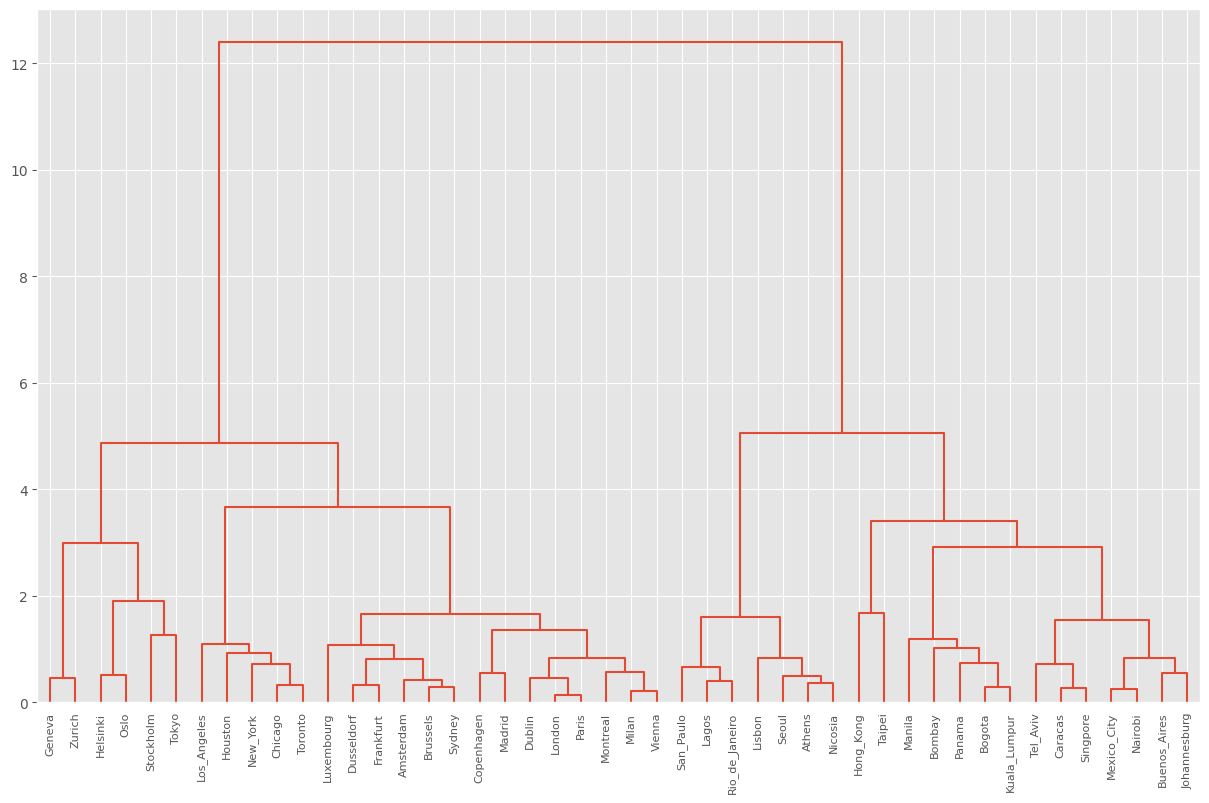

In [15]:
#  Убираем автоматическое определение числа кластеров с помощью color_threshold = -1 
fig = plt.figure(figsize=(15,9))
dn = dendrogram(link, color_threshold = -1,                 
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist())

### Построим каменистую осыпь

Эт график, помогающий определить число кластеров \
Будем использовать второй столбец матрицы link где хранятся расстояния между объединяемыми кластерами.

Text(0, 0.5, 'Расстояние')

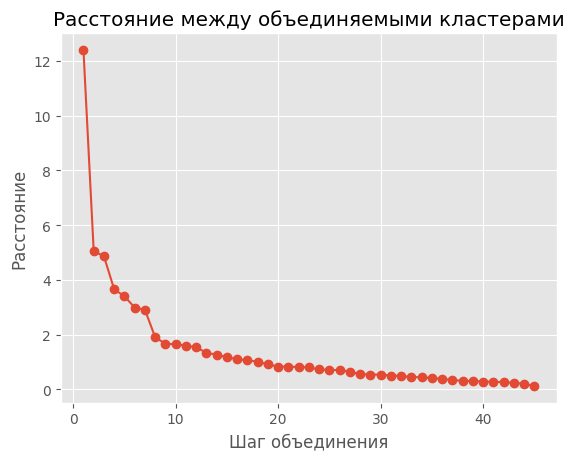

In [17]:
dist = link[:, 2]

dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

На основании анализа дендрограммы и графика «каменистой осыпи» было принято решение выделить **четыре кластера**.

При дальнейшем увеличении числа кластеров прирост информативности становится незначительным, а объединение свыше четырёх групп приводит к потере интерпретируемости результатов

### Интерпретация результатов 

In [ ]:
#  Добавляем столбец cluster к таблице данных
df_clean['cluster'] = fcluster(link, 4, criterion='distance')

In [19]:
#  Средние значения в каждом кластере
df_clean.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,1780.500000,108.550000,71.300000
2,1792.000000,77.526316,55.157895
3,1798.857143,50.942857,19.214286
4,2082.357143,53.121429,14.914286


### Выводы

### 1 
Основное различие между кластерами определяется уровнем цен и зарплат, тогда как количество рабочих часов играет второстепенную роль.

### 2

Исходя из полученных результатов, можно выделить четыре экономических типа городов:

**Кластер 1 - богатые и дорогие города**

**Кластер 2 - развитые и сбалансированные**

**Кластер 3 - недорогие, но и низкооплачиваемые**

**Кластер 4 - тоже недорогие и низкооплачиваемые, но при этом очень трудоемкие. По сути дешевая рабочая сила**